# Supervised Learning

In this notebook, we are going to attempt different tree-based supervised learning models. They are:
- Decision Tree
- Random Forest
- CatBoost
- XGBoost
- LGMB

**Things to look into:**
- Why is the model so perfect?
- Is there something we are missing?
**Things to do:**
- edit the scoring metric to include recall and f1 (note: need to adjust it since our classification is multiclass)

# Load in the Dataset + Packages

In [1]:
# pip install graphviz
import sklearn
import graphviz 
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#dataset
# df = pd.read_excel("df_full_clean.xlsx", usecols = "A:BB")
df = pd.read_excel("smote.xlsx", usecols = "A:BA")


#imputation of NRI score with mean value
df['NRI score'] = df['NRI score'].replace(0, np.NaN)
df['NRI score'] = df['NRI score'].replace(np.NaN, df['NRI score'].mean())

In [3]:
df['NRI score'].mean()

74.69000150711354

In [4]:
df['NRI score'].unique()

array([8.10898203e+01, 7.64796134e+01, 7.46900015e+01, 7.89453554e+01,
       8.20616375e+01, 7.65981869e+01, 7.22550478e+01, 7.49625191e+01,
       4.97445967e+01, 7.37891479e+01, 8.15679290e+01, 7.47907437e+01,
       6.99428590e+01, 4.09287916e+01, 8.00144209e+01, 5.77440389e+01,
       6.68975472e+01, 7.97046319e+01, 1.35006525e+00, 3.02574461e+01,
       7.85332743e+01, 7.84390977e+01, 7.48955242e+01, 7.98244949e+01,
       5.27572774e+01, 8.02263746e+01, 6.42946409e+01, 1.72930673e+01,
       7.95277424e+01, 7.76464254e+01, 1.31705350e+01, 6.58112836e+01,
       7.66715108e+01, 4.99594734e+01, 8.03824712e+01, 6.03864819e+01,
       8.02899764e+01, 5.08731465e+01, 7.69517429e+01, 6.76484782e+01,
       3.41055772e+01, 7.78220537e+01, 8.00462086e+01, 4.23877542e+01,
       7.88087317e+01, 7.88577502e+01, 7.87869636e+01, 4.42207621e+01,
       7.81091391e+01, 7.71602242e+01, 1.64731245e+00, 1.89671320e+01,
       8.09437931e+01, 7.65864483e+01, 7.95639655e+01, 5.41580826e+01,
      

In [5]:
df['Risk_Label'] = df['Risk_Label'].astype('category')
df['Risk_Label']

0       Low Risk
1       Low Risk
2       Low Risk
3       Low Risk
4         Medium
          ...   
2878    Low Risk
2879    Low Risk
2880    Low Risk
2881    Low Risk
2882    Low Risk
Name: Risk_Label, Length: 2883, dtype: category
Categories (3, object): ['High', 'Low Risk', 'Medium']

In [6]:
# dropped security_test_category
X = df.drop(columns = ['Risk_Label'])
y = df['Risk_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train

,usage_base,authentication,server_name,is_pii,is_fii,NRI score,AI & Data Science,Business & Technology,Environment & Weather,Finance & Banking,...,referrer-policy,content-type,set-cookie,access-control-allow-origin,server,x-powered-by,x-aspnet-version,x-ratelimit-limit,metadata_fields_count,parameters_count
2662,2,1,0,False,False,76.479613,0,0,0,0,...,0,0,0,1,0,1,0,0,3,2
2191,2,1,0,True,True,69.096877,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
800,2,1,1,False,False,74.690002,0,0,0,0,...,0,0,0,0,1,1,1,0,6,1
808,2,1,0,False,False,76.479613,0,0,0,1,...,0,1,0,0,0,0,0,0,4,1
2655,2,1,0,False,False,80.493562,0,0,0,0,...,0,0,0,0,0,1,0,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,2,1,1,False,False,81.089820,0,0,0,0,...,0,0,0,0,1,1,0,0,3,3
1245,2,1,1,True,False,74.690002,0,0,0,0,...,0,1,0,1,1,0,0,0,3,1
989,2,1,1,False,False,74.690002,0,0,0,0,...,0,0,0,0,1,1,1,0,4,6
2742,2,1,0,False,False,76.998341,0,0,0,0,...,0,0,0,0,0,1,0,0,3,2


In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

## 1. Decision Tree

### Basic Approach

In [9]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
clf = tree.DecisionTreeClassifier(random_state=37, max_depth = 6, criterion='gini')

In [10]:
clf = clf.fit(X_train,y_train)

In [11]:
clf.predict(X_test)

array(['High', 'High', 'Low Risk', 'Medium', 'Low Risk', 'Medium', 'High',
       'Low Risk', 'Medium', 'Medium', 'High', 'Medium', 'Low Risk',
       'Medium', 'Low Risk', 'High', 'High', 'Medium', 'Medium',
       'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk', 'Low Risk',
       'Medium', 'High', 'Medium', 'Low Risk', 'Low Risk', 'Low Risk',
       'High', 'High', 'Medium', 'Low Risk', 'Medium', 'High', 'Medium',
       'Low Risk', 'High', 'Medium', 'Low Risk', 'Low Risk', 'High',
       'High', 'High', 'Medium', 'High', 'Low Risk', 'Low Risk',
       'Low Risk', 'High', 'High', 'Medium', 'Low Risk', 'High', 'High',
       'Medium', 'Medium', 'High', 'High', 'Low Risk', 'Low Risk',
       'Low Risk', 'High', 'Medium', 'High', 'Medium', 'Low Risk', 'High',
       'High', 'High', 'Medium', 'Medium', 'Medium', 'Low Risk', 'Medium',
       'Low Risk', 'High', 'Low Risk', 'Low Risk', 'Medium', 'Medium',
       'High', 'Low Risk', 'High', 'Medium', 'Medium', 'High', 'High',
       'High',

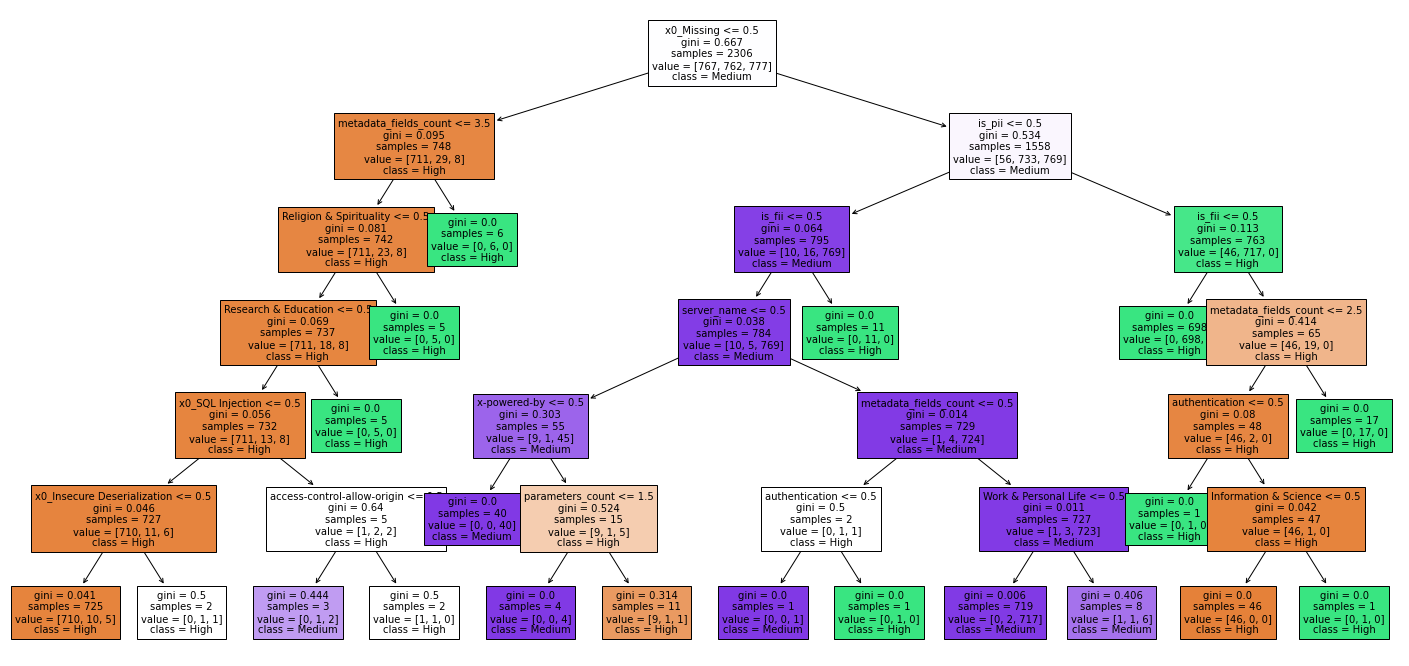

In [12]:
# Visualise the tree
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize=(25,12))
fn = list(X_train)
cn = list(y_train)
tree.plot_tree(clf, 
              feature_names = fn,
              class_names = cn,
              fontsize=10,
              filled=True)
fig.savefig('trial.png')

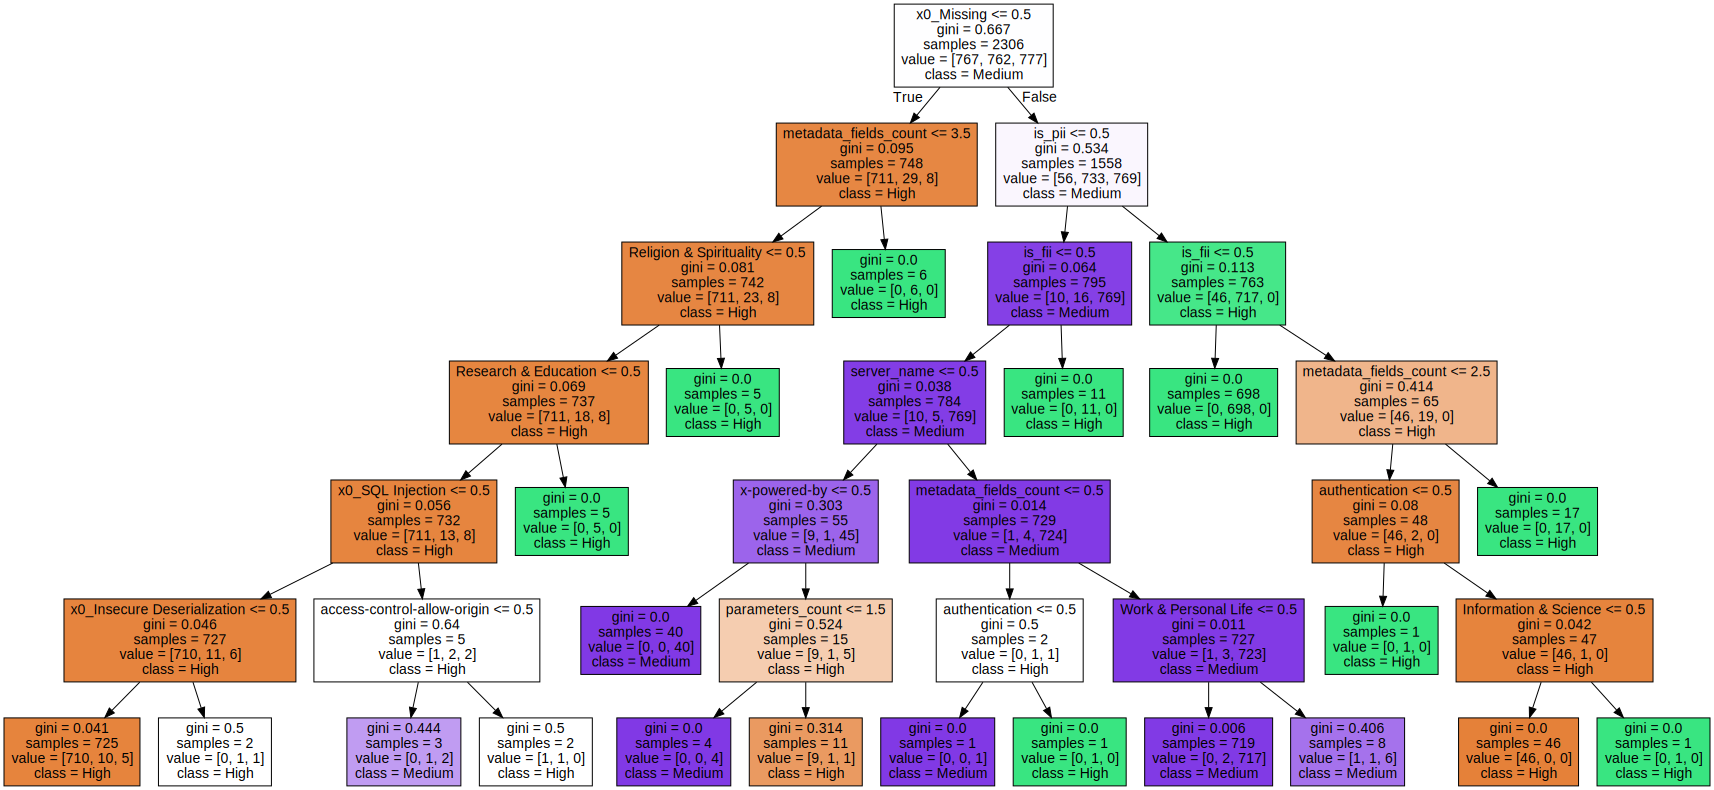

In [13]:
# Alternative visualisation
visualise_tree = tree.export_graphviz(clf, out_file=None,
                                      feature_names = fn,
                                      class_names = cn,
                                     filled=True)
graph = graphviz.Source(visualise_tree)
graph

# See here for more [https://scikit-learn.org/stable/modules/tree.html]


In [14]:
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9930675909878682


### Various hyperparameters to attempt

In [15]:
# max depth
clf_maxdepth = DecisionTreeClassifier(random_state=37, max_depth=5)
clf_maxdepth = clf_maxdepth.fit(X_train,y_train)
y_pred = clf_maxdepth.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9948006932409013


In [16]:
# max_leaf_nodes
clf_maxleafnode = DecisionTreeClassifier(random_state=37, max_leaf_nodes=5)
clf_maxleafnode = clf_maxleafnode.fit(X_train,y_train)
y_pred = clf_maxleafnode.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9705372616984402


## 2. Random Forest

### Basic Approach

In [17]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [18]:
scoring_metric = ["accuracy", "f1_weighted"]
results = {}

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
rf_clf = RandomForestClassifier(n_estimators=100, random_state=37, n_jobs=-1) # n_estimators = no. of trees in the forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=37)

In [20]:
results["Random forests"] = mean_std_cross_val_scores(
    rf_clf, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_weighted,train_f1_weighted
Random forests,0.670 (+/- 0.853),0.075 (+/- 0.049),0.984 (+/- 0.005),0.992 (+/- 0.001),0.984 (+/- 0.005),0.992 (+/- 0.001)


In [21]:
# rf_clf(X_test)

In [22]:
# print("Accuracy:", metrics.accuracy_score(y_test, y_pred_rf_clf))

In [23]:
# feature importance
# feature_imp = pd.Series(rf_clf.feature_importances_, 
                        # index = X_train.feature_names).sort_values(ascending = False)
# feature_imp

### Various hyperparameters to attempt

In [24]:
# random_grid = {'bootstrap': [True, False],
#                'max_depth': [2, 4, 6, 8, 10, 12, None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4],
#                'min_samples_split': [2, 5, 10],
#                'n_estimators': [130, 180, 230]}

In [25]:
# scoring_metric = ["accuracy"]
# rf_random = RandomizedSearchCV(estimator = rf, 
#                                param_distributions = random_grid, 
#                                n_iter = 100, 
#                                cv = 3, 
#                                verbose=2, 
#                                random_state=37, 
#                                n_jobs = -1,
#                                scoring = scoring_metric,
#                                return_train_score=True)

In [26]:
# rf_random.fit(X_train, y_train)

In [27]:
# cv_results = rf_random.cv_results_
# for mean_score, params in zip(cv_results["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [28]:
# find best params
# best_params = rf_random.best_params_
# best_params

In [29]:
# best score
# rf_random.best_score_

In [30]:
# df_rf_random = pd.DataFrame(rf_random.cv_results_)
# df_rf_random

## 3. All the boosts

### Reference:
https://pages.github.ubc.ca/mds-2021-22/DSCI_573_feat-model-select_students/lectures/05_ensembles.html

In [31]:
classifiers = {
    "CatBoost": CatBoostClassifier(verbose=0, random_state=37),
    "XGBoost": XGBClassifier(random_state=37, eval_metric='logloss', verbosity=0),
    # "LightGBM": LGBMClassifier(random_state=37),
    "Decision Tree": DecisionTreeClassifier(random_state=37),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=37)
}

In [32]:
results = {}
scoring_metric = ["accuracy", "f1_macro", "recall_macro"]

In [33]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)


In [34]:
dummy = DummyClassifier(strategy="stratified")
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

In [35]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/573/lib/python3.9/site-packages/xgboost/sklearn.py:88

In [36]:
pd.DataFrame(results).T

,fit_time,score_time,test_accuracy,train_accuracy,test_f1_macro,train_f1_macro,test_recall_macro,train_recall_macro
Dummy,0.002 (+/- 0.000),0.006 (+/- 0.002),0.338 (+/- 0.017),0.340 (+/- 0.008),0.338 (+/- 0.017),0.340 (+/- 0.008),0.338 (+/- 0.017),0.340 (+/- 0.008)
CatBoost,3.445 (+/- 0.410),0.011 (+/- 0.001),0.985 (+/- 0.005),0.992 (+/- 0.001),0.985 (+/- 0.005),0.992 (+/- 0.001),0.985 (+/- 0.005),0.992 (+/- 0.001)
XGBoost,1.374 (+/- 0.230),0.016 (+/- 0.003),0.984 (+/- 0.004),0.991 (+/- 0.001),0.984 (+/- 0.004),0.991 (+/- 0.001),0.984 (+/- 0.005),0.991 (+/- 0.001)
Decision Tree,0.015 (+/- 0.003),0.012 (+/- 0.003),0.979 (+/- 0.005),0.992 (+/- 0.001),0.979 (+/- 0.005),0.992 (+/- 0.001),0.979 (+/- 0.005),0.992 (+/- 0.001)
Random Forest,0.202 (+/- 0.019),0.023 (+/- 0.001),0.984 (+/- 0.005),0.992 (+/- 0.001),0.984 (+/- 0.005),0.992 (+/- 0.001),0.984 (+/- 0.005),0.992 (+/- 0.001)


In [37]:
# CatBoost
model = CatBoostClassifier(verbose=0, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: CatBoost")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

Model: CatBoost
Accuracy: 0.9896013864818024
F1 score: 0.9896167574455651
Recall: 0.989453749398419


In [38]:

print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

              precision    recall  f1-score   support

        High       0.99      0.99      0.99       194
    Low Risk       0.98      0.99      0.99       199
      Medium       0.99      0.98      0.99       184

    accuracy                           0.99       577
   macro avg       0.99      0.99      0.99       577
weighted avg       0.99      0.99      0.99       577



In [39]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Random Forest")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

Model: Random Forest
Accuracy: 0.9896013864818024
F1 score: 0.9894991419110689
Recall: 0.989453749398419


In [40]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

              precision    recall  f1-score   support

        High       0.98      0.99      0.99       194
    Low Risk       0.99      0.99      0.99       199
      Medium       0.99      0.98      0.99       184

    accuracy                           0.99       577
   macro avg       0.99      0.99      0.99       577
weighted avg       0.99      0.99      0.99       577



In [41]:
# Decision Tree
model = DecisionTreeClassifier(random_state=37)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f"Model: Decision Tree")
print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"F1 score: {metrics.f1_score(y_test, predictions, average='macro')}")
print(f"Recall: {metrics.recall_score(y_test, predictions, average='macro')}")

Model: Decision Tree
Accuracy: 0.9878682842287695
F1 score: 0.9878690402418643
Recall: 0.9877355363399998


In [42]:
print(
    classification_report(
        y_test, predictions, target_names=["High", "Low Risk", "Medium"]
    )
)

              precision    recall  f1-score   support

        High       0.98      0.98      0.98       194
    Low Risk       0.99      0.99      0.99       199
      Medium       0.99      0.98      0.99       184

    accuracy                           0.99       577
   macro avg       0.99      0.99      0.99       577
weighted avg       0.99      0.99      0.99       577

